In [ ]:
# 4분위수

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('movie_metadata.csv')

# 1. 예산을 기준으로 75% 지점에서 5 IQR 만큼 더한 것보다 큰 예산의 영화는 제거하고, 다시 산점도를 그려보세요.

q1 = df['budget'].quantile(0.25)
q3 = df['budget'].quantile(0.75)
iqr = q3-q1

condition = df['budget'] > (q3 + iqr*5)

df.drop(df[condition].index,axis=0,inplace=True)

fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.scatter(df['budget'],df['imdb_score'])

<AxesSubplot:xlabel='budget', ylabel='imdb_score'>

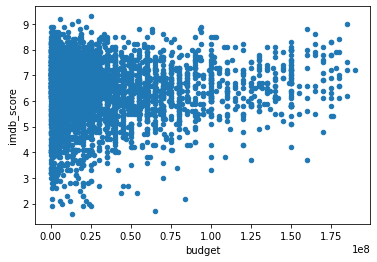

In [36]:
#2. movie_metadata.csv에서 예산이 가장 높은 15개 영화를 제거하고, 산점도를 그려보세요.

condition2 = ((df['budget'].sort_values(ascending=False)).index)[0:16]

df.drop(condition2,axis=0,inplace=True)

df.plot(kind='scatter',x='budget',y='imdb_score')

In [1]:
# 크롤링 수업

In [ ]:
# HTML코드 가져오기

# 웹사이트의 주소 구조를 파악해보고, 제공되는 모든 데이터를 받아올 수 있도록 모든 페이지의 HTML 코드(response의 text)를 가져와서 rating_pages에 저장해 보세요.
# 2010년 1월부터 2012년 12월까지 모든 달에 대해, 1주차~5주차 페이지를 순서대로 리스트에 넣으면 됩니다. (모든 달에 5주차가 있다고 가정하세요.)

import requests

# 코드를 작성하세요

rating_pages = []
for year in range(2010,2013) :
    for month in range(1,13) :
        for week in range(0,5) :
            rating_pages.append(requests.get(f'https://workey.codeit.kr/ratings/index?year={year}&month={month}&weekIndex={week}').text)

# 테스트 코드
print(len(rating_pages)) # 가져온 총 페이지 수 
print(rating_pages[0]) # 첫 번째 페이지의 HTML 코드

In [5]:
# Parsing => HTML에서 원하는 정보를 뽑아내기

from bs4 import BeautifulSoup as bs

html_code = """<!DOCTYPE html>
<html>
<head>
    <title>Sample Website</title>
</head>
<body>
<h2>HTML 연습!</h2>

<p>이것은 첫 번째 문단입니다.</p>
<p>이것은 두 번째 문단입니다!</p>

<ul>
    <li>커피</li>
    <li>녹차</li>
    <li>우유</li>
</ul>

<img src='https://i.imgur.com/bY0l0PC.jpg' alt="coffee"/>
<img src='https://i.imgur.com/fvJLWdV.jpg' alt="green-tea"/>
<img src='https://i.imgur.com/rNOIbNt.jpg' alt="milk"/>

</body>
</html>"""

In [8]:
# HTML코드 Beautifulsoup 타입으로 파싱하기

soup = bs(html_code, 'html.parser')

print(type(soup))

<class 'bs4.BeautifulSoup'>


In [13]:
# 특정 HTML태그만 선택하기

li_tags = soup.select('li')
print(li_tags)
print(type(li_tags[0]))

[<li>커피</li>, <li>녹차</li>, <li>우유</li>]
<class 'bs4.element.Tag'>


In [16]:
# 선택한 테그에서 텍스트만 꺼내기
print(li_tags[0].text)
print(li_tags[0])

커피
<li>커피</li>


In [22]:
# 태그의 속성값 출력하기 => 태그['속성이름']

img_tags = soup.select('img')

print(img_tags[0]['src'])

img_srcs = []

for img in img_tags :
    img_srcs.append(img['src'])

img_srcs


https://i.imgur.com/bY0l0PC.jpg


['https://i.imgur.com/bY0l0PC.jpg',
 'https://i.imgur.com/fvJLWdV.jpg',
 'https://i.imgur.com/rNOIbNt.jpg']

In [35]:
# 파싱 연습

import requests
from bs4 import BeautifulSoup as bs

response = requests.get('https://workey.codeit.kr/music/index')
soup = bs(response.text, 'html.parser')

li_tags = soup.select('.popular__order li') # popular__order class에 중첩된 li태그들만 가져오기

popular_artists = []

for li in li_tags :
    popular_artists.append(li.text.strip())

popular_artists

['1 아이유 (IU)',
 '2 방탄소년단',
 '3 Red Velvet (레드벨벳)',
 '4 IKON',
 '5 멜로망스',
 '6 다비치',
 '7 윤딴딴',
 '8 수지 (SUZY)',
 '9 김동률',
 '10 폴킴']

In [ ]:
# CSS 선택자 정리하기
'''
1. 태그이름
li, p : 모든 li, p 태그

2. ID
#abc : ID가 abc인 태그

3. 클래스
.abc : CLASS가 abc인 태그

4. 속성
[alt='green-tea'] alt속성의 값이 'green-tea'인 태그

5. OR연산(두 선택자를 ,로 연결)
-. #login, .left : ID가 login이거나 class가 left인 태그
-. p, i : 모든 p태그 or i태그

6. AND연산(두 선택자를 붙여씀)
-. .favorite.private : favorite, private 클래스를 모두 가진 태그
-. p.favorite : favorite클래스를 가진 p태그

7. 중첩된 요소들(두 선택자를 띄어서 쓰면 됨)
-. .favorite .private : favorite클래스를 가진 태그에 중첩된 private클래스를 가진 태그
-. p .favorite : p태그에 중첩된 favorite클래스를 가진 태그

'''

In [49]:
import requests
from bs4 import BeautifulSoup

# 모든 지점의 전화번호가 포함된 리스트를 print 해 보세요.

response = requests.get('https://workey.codeit.kr/orangebottle/index')

soup = BeautifulSoup(response.text, 'html.parser')

phone_number = soup.select('span.phoneNum') # span태그이면서 class가 phoneNum

phone_numbers = []

for num in phone_number :
    phone_numbers.append(num.text)


In [61]:
# 음악 사이트의 검색어 순위를 받아오려 합니다.

# '인기 아티스트' 아래에 있는 '검색어 순위'의 1위~10위 데이터를 파싱해서 리스트에 담아 print 해 보세요.

response = requests.get('https://workey.codeit.kr/music/index')

soup = BeautifulSoup(response.text, 'html.parser')

rank = soup.select('.rank__order li.list') # rank__order 클래스 내 li태그이고 list클래스인 태그들

search_ranks = []

for name in rank :
    search_ranks.append(name.text.strip().split(' ')[2])

search_ranks

['Queen', '방탄소년단', '아이유', '거미', '폴킴', '김범수', '헤이즈', '트와이스', '박효신', '신용재']

In [ ]:
import time
import requests
from bs4 import BeautifulSoup

url = 'https://www.ssg.com/search.ssg?target=all&query=nintendo&page='

headers = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36',
} # 알 수 없는 정보들을 다 쳐내기 때문에 기기정보를 작성해주는 것 (크롬으로 설정)

page_num = 1

pages = []

while 1 :

    res = requests.get(url+str(page_num), headers = headers)

    soup = BeautifulSoup(res.text, 'html.parser')

    if len(soup.select('.csrch_tip')) == 0 :
        pages.append(soup)
        print(str(page_num) + "번째 페이지 가져오기 완료")
        page_num += 1
        time.sleep(3)   # 너무 빠르게 가져오면 서버에서 차단할 수 있기때문에 3초간 쉬어줌
    else :
        break

In [ ]:
# 2010년 1월부터 2012년 12월까지 모든 달에 대해, 데이터가 있는 모든 페이지의 HTML 코드(response의 text)를 rating_pages에 저장해 보세요.

# 주의: BeautifulSoup 타입으로 변환한 코드가 아닌, response의 text를 리스트에 저장하세요!

# 코드를 작성하세요.
rating_pages = []

for year in range(2010,2013) :
    for month in range(1,13) :
        for week in range(0,5) :
            response = requests.get('https://workey.codeit.kr/ratings/index?year={}&month={}&weekIndex={}'.format(year,month,week))
            soup = BeautifulSoup(response.text, 'html.parser')
            
            if len(soup.select('td.rank')) != 0 :
                rating_pages.append(response.text)
            else :
                continue
# 테스트 코드
print(len(rating_pages)) # 가져온 총 페이지 수 
print(rating_pages[0]) # 첫 번째 페이지의 HTML 코드

In [69]:
import pandas as pd
# SSG닷컴 닌텐도 검색결과를 데이터프레임으로 만들기

# 빈 리스트 생성
records = []

# 시작 페이지 지정
page_num = 1

# headers 지정
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.114 Safari/537.36',}

while len(records)<20 :
    # HTML 코드 받아오기  
    response = requests.get('https://www.ssg.com/search.ssg?target=all&query=nintendo&page='+str(page_num), headers = headers)

    # BeautifulSoup 타입으로 변형하기
    soup = BeautifulSoup(response.text, 'html.parser')

    # "prodName" 클래스가 있을 때만 상품 정보 가져오기
    if len(soup.select('.csrch_tip')) == 0:
        product_names = soup.select('.cunit_info > div.cunit_md.notranslate > div > a > em.tx_ko')
        product_prices = soup.select('.cunit_info > div.cunit_price.notranslate > div.opt_price > em')
        product_urls = soup.select('.cunit_prod > div.thmb > a > img')
        page_num += 1
        time.sleep(3)    

        for i in range(len(product_names)):
            record = []
            record.append(product_names[i].text)
            record.append(product_prices[i].text.strip())
            record.append("https://www.ssg.com" + product_urls[i].get('src'))
            records.append(record)
    else:
        break

# DataFrame 만들기
df = pd.DataFrame(data = records, columns = ["이름", "가격", "이미지 주소"])

# DataFrame 출력
df.head()


,이름,가격,이미지 주소
0,(사전예약~6/22)[닌텐도 스위치] 파이어 엠블렘 무쌍 풍화설월(마우스패드 증정),"59,800",https://www.ssg.com//sitem.ssgcdn.com/38/03/81...
1,☆빅스마일데이☆[닌텐도] 스위치 젤다의 전설 스카이워드 소드 HD,"44,500",https://www.ssg.com//sitem.ssgcdn.com/61/16/35...
2,☆빅스마일데이☆[닌텐도] 스위치 프로 컨트롤러,"77,800",https://www.ssg.com//sitem.ssgcdn.com/11/94/39...
3,☆빅스마일데이☆[닌텐도] 스위치 포켓몬스터 레전드 아르세우스,"63,700",https://www.ssg.com//sitem.ssgcdn.com/17/00/27...
4,☆빅스마일데이☆[닌텐도] 스위치 조이콘 L/R (정품),"89,000",https://www.ssg.com//sitem.ssgcdn.com/17/00/27...


In [76]:
# 티비랭킹닷컴의 데이터를 파싱(Parsing)하여 DataFrame으로 만들어서 분석하기

import pandas as pd
import requests
from bs4 import BeautifulSoup

# 기간 지정
years = range(2010, 2013)
months = range(1, 13)
weeks = range(0, 5)

# 페이지를 담는 빈 리스트 생성
rating_pages = []

for year in years:
    for month in months:
        for week in weeks:
            # HTML 코드 받아오기
            url = "https://workey.codeit.kr/ratings/index?year={}&month={}&weekIndex={}".format(year, month, week)
            response = requests.get(url)

            # BeautifulSoup 타입으로 변환하기
            soup = BeautifulSoup(response.text, 'html.parser')

            # "row" 클래스가 1개를 넘는 경우만 페이지를 리스트에 추가
            if len(soup.select('.row')) > 1:
                rating_pages.append(soup)

# 레코드를 담는 빈 리스트 만들기
records = []

# 각 페이지 파싱해서 정보 얻기
for page in rating_pages:
    date = page.select('option[selected=selected]')[2].text
    ranks = page.select('.row .rank')[1:]
    channels = page.select('.row .channel')[1:]
    programs = page.select('.row .program')[1:]
    percents = page.select('.row .percent')[1:]

    # 페이지에 있는 10개의 레코드를 리스트에 추가
    for i in range(10):
        record = []
        record.append(date)
        record.append(ranks[i].text)
        record.append(channels[i].text)
        record.append(programs[i].text)
        record.append(percents[i].text)
        records.append(record)

# DataFrame 만들기
df = pd.DataFrame(data=records, columns=['period', 'rank', 'channel', 'program', 'rating'])

# 결과 출력
df.head()



,period,rank,channel,program,rating
0,2009.12.28 ~ 2010.01.03,1,KBS2,주말연속극(수상한삼형제),33.4
1,2009.12.28 ~ 2010.01.03,2,KBS1,일일연속극(다함께차차차),33.1
2,2009.12.28 ~ 2010.01.03,3,KBS2,해피선데이,27.1
3,2009.12.28 ~ 2010.01.03,4,MBC,MBC연기대상2부,24.4
4,2009.12.28 ~ 2010.01.03,5,SBS,주말극장(천만번사랑해),24.2


KeyError: ('period', 'rank')